In [1]:
from pathlib import Path
from qa2nli.qa_readers import race 
import tqdm
from typing import *
from joblib import delayed, Parallel
import json
import random
import math
import pandas as pd

In [2]:
input_path = Path('.data/RACE/set3/dev.json')
label_field = 'label'
premise_field = 'premise'
hypothesis_field = 'hypothesis'

In [3]:
with open(input_path) as f:
    samples = json.load(f)
print(f"Input samples {len(samples)}")

Input samples 9984


In [4]:
pos_samples = [s for s in samples if s[label_field]==1]

In [5]:
neg_samples = [s for s in samples if s[label_field]==0]

In [6]:
print(f"Positive samples: {len(pos_samples)}\nNegative samples:{len(neg_samples)}\nRatio: {len(pos_samples)/len(neg_samples)}\nTotal: {len(pos_samples)+len(neg_samples)}")

Positive samples: 2496
Negative samples:7488
Ratio: 0.3333333333333333
Total: 9984


In [7]:
def get_length(s: str):
    tokens = s.split()
    return len(tokens)
# lengths
for ex in samples:
    ex[premise_field + '_length'] = get_length(ex[premise_field])
    ex[hypothesis_field + '_length'] = get_length(ex[hypothesis_field])

In [8]:
df_samples = pd.DataFrame(samples)

In [9]:
df_samples.describe()

,premise_length,hypothesis_length
count,9984.000000,9984.000000
mean,278.188301,13.251202
std,90.552125,4.580794
min,41.000000,2.000000
25%,229.750000,10.000000
50%,281.000000,13.000000
75%,323.250000,16.000000
max,868.000000,39.000000


In [10]:
df_samples.quantile(0.9)

label                   1.0
valid_question          1.0
valid_option            1.0
conversion_success      1.0
exception               0.0
premise_length        369.0
hypothesis_length      19.0
Name: 0.9, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd78550>,
      dtype=object)

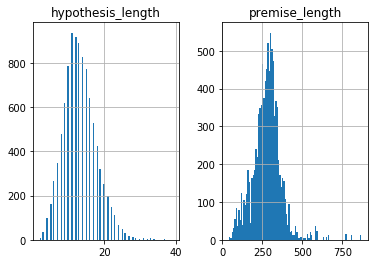

In [11]:
df_samples.hist(bins=100,column=['premise_length', 'hypothesis_length'])

In [12]:
# How many hypothesis have "following" in them? 
has_following = [s for s in samples if 'following' in s[hypothesis_field].lower()]
question_has_following = [s for s in samples if 'following' in s[hypothesis_field].lower()]
print(f"Hypothesis has 'following': {len(has_following)}") 
print(f"question has 'following': {len(question_has_following)}")        
print(len(has_following)/4)

Hypothesis has 'following': 83
question has 'following': 83
20.75


In [13]:
print(f"Fraction of samples having 'following' {len(has_following)/(len(pos_samples)+len(neg_samples))}")

Fraction of samples having 'following' 0.008313301282051282


In [14]:
has_following[10]

{'id': 'high13577.txt_2_A',
 'premise': 'Now scientists believe that global warming affects hibernating animals, causing them to wake up earlier. While this may seem a little concern, it is in fact a serious environmental problem. The shortened hibernation period could actually lead to significant decreases in the population of several species.\nSome of the first evidence of the problem came from Colorado, where researchers at the Rocky Mountain Biological Lab have been observing marmot   hibernation behavior since the 1970s. In the early days of their studies, marmots generally hibernated several weeks into the month of May. Nowadays, however, temperatures in the area have risen by 2.5 degrees Fahrenheit, and the marmots wake up about a month earlier.\nAt least the marmots are still hibernating. Several other animals have not been hibernating at all recently. Brown bears in the Spanish Cantabrian Mountains did not hibernate last year. Chipmunks   in the US and some snakes in Australia

In [15]:
#with open('test_has_following.json', 'w') as f:
#    json.dump(has_following,f)

In [16]:
# How many hypothesis have "_" in them? 
has_blank = [s for s in samples if '_' in s[hypothesis_field].lower()]
question_has_blank = [s for s in samples if '_' in s[hypothesis_field].lower()]
print(f"Hypothesis has '_': {len(has_blank)}") 
print(f"question has '_': {len(question_has_blank)}")        

Hypothesis has '_': 926
question has '_': 926


In [17]:
print(f"Fraction of samples having '_' {len(has_blank)/(len(pos_samples)+len(neg_samples))}")

Fraction of samples having '_' 0.09274839743589744


In [18]:
following_ids = set([s['id'] for s in has_following])
blank_ids = set([s['id'] for s in has_blank])
common_ids = following_ids.intersection(blank_ids)
print(f"Common: {len(common_ids)}")

Common: 28
